<a href="https://colab.research.google.com/github/freakingdark/Nonlinear_Dynamics_Masters_Project/blob/main/Y_segment_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

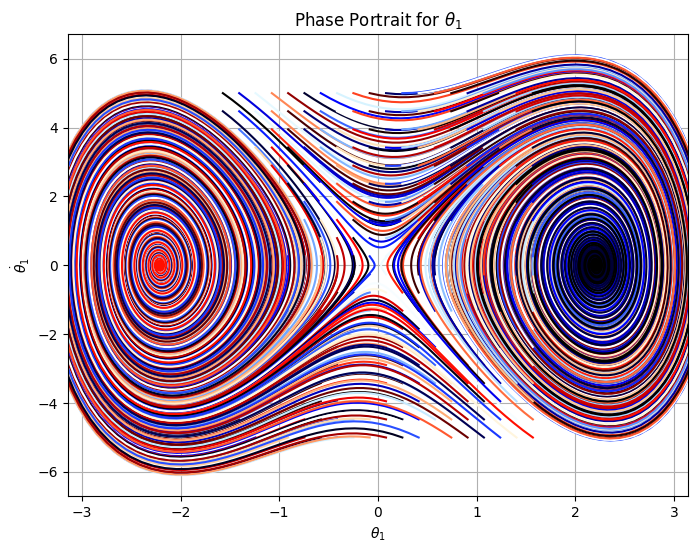

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
# Define the differential equations for theta1
def nldpf_eq_theta(y, t, b, g, k1, alpha1, k2, alpha2, phib, Qdrive1, Qdrive2, Qdrive3):
    theta1, theta1_dot, _, _, _, _ = y
    d_theta1_dt = theta1_dot
    d_phi1_dt = 0
    d_phi2_dt = 0
 # Equations for theta1_dot
    d_theta1_dot_dt = (
        (1 / (9/4 * m * l**2 - m * l**2 * np.cos(phib) - m * l**2 * np.cos(phib)))) * (
            theta1_dot * 0 * m * l**2 * np.sin(phib) +
            theta1_dot * 0 * m * l**2 * np.sin(phib) +
            (1/2) * m * l**2 * theta1_dot**2 * (np.sin(phib) - np.sin(phib)) +
            2 * np.sin(phib) * np.cos(phib) -
            2 * np.sin(phib) * np.cos(phib) +
            k2 * (0 - 0) +
            k2 * alpha2 * (0**3 - 0**3) -
            theta1_dot * (9 * b * l**2 / 4 - b * l**2 * np.cos(phib)) +
            (Qdrive1 - Qdrive2 + Qdrive3) +
            m * g * l * (np.sin(phib) - theta1 * np.cos(phib) - np.sin(phib) - theta1 * np.cos(phib)) +
            2 * k2 * (0 * np.cos(phib) - 0 * np.cos(phib)) +
            2 * k2 * alpha2 * (0**3 * np.cos(phib) - 0**3 * np.cos(phib)) -
            2 * (Qdrive2 * np.cos(phib) - Qdrive3 * np.cos(phib)) +
            (1/2) * 0**2 * m * l**2 * np.sin(phib) -
            (1/2) * 0**2 * m * l**2 * np.sin(phib) +
            (5/2) * m * g * l * np.sin(theta1) -
            k1 * theta1 -
            k1 * alpha1 * theta1**3
        )

    return [d_theta1_dt, d_theta1_dot_dt, d_phi1_dt, 0, 0, 0]

# Parameters
m = 1  # Mass
g = 9.8  # Gravitational acceleration
l = 1  # Length of the pendulum
k1 = 1  # Spring constant 1
alpha1 = 1  # Nonlinear coefficient 1
k2 = 1  # Spring constant 2
alpha2 = 1  # Nonlinear coefficient 2
phib =30  # Phase shift
Qdrive1 = 0 # External force 1
Qdrive2 = 0  # External force 2
Qdrive3 = 0  # External force 3
b=0.5

# Define the range of initial conditions for theta1 and its derivative
theta1_range = np.linspace(-np.pi/2, np.pi/2, 20)
theta1_dot_range = np.linspace(-5, 5, 20)

# Time points for integration
t = np.linspace(0, 20, 1000)

# Plot the phase portrait for theta1
plt.figure(figsize=(8,6))
color_map = plt.cm.flag(np.linspace(0, 1, len(theta1_range) * len(theta1_dot_range)))

idx = 0
for theta1_0 in theta1_range:
    for theta1_dot_0 in theta1_dot_range:
        y0 = [theta1_0, theta1_dot_0, 0, 0, 0, 0]  # Initial conditions for phi1, phi2 and their derivatives are set to 0
        solution = odeint(nldpf_eq_theta, y0, t, args=(b, g, k1, alpha1, k2, alpha2, phib, Qdrive1, Qdrive2, Qdrive3))
        theta1, theta1_dot, _, _, _, _ = solution.T
        plt.plot(theta1, theta1_dot, color=color_map[idx], alpha=1)
        idx += 1

plt.xlabel(r'$\theta_1$')
plt.ylabel(r'$\dot{\theta}_1$')
plt.title('Phase Portrait for $\\theta_1$')
plt.grid(True)
plt.xlim(-np.pi, np.pi)  # Set x-axis limits
plt.show()


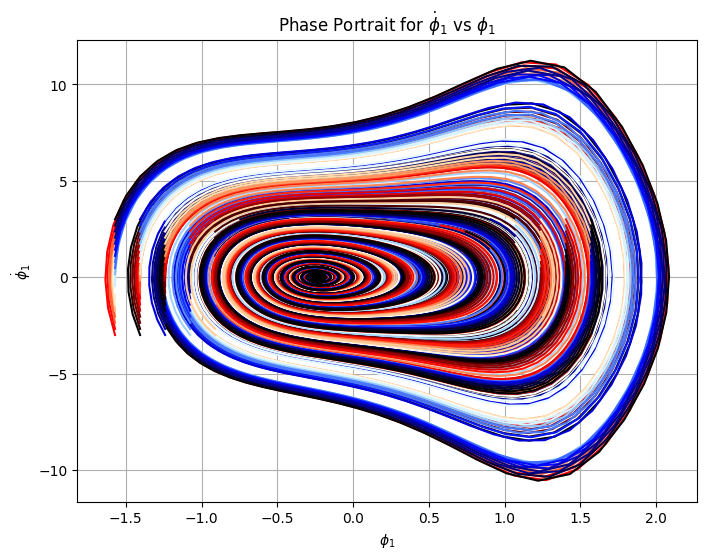

In [ ]:










































































import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

def phi1_dot_eq(y, t, b, g, k1, alpha1, k2, alpha2, phib, Qdrive1, Qdrive2, Qdrive3, theta1_dot, phi2_dot):
    theta1, theta1_dot, phi1, phi1_dot, phi2, phi2_dot = y

    # Define the equation for phi1_dot
    d_phi1_dot_dt = (
        (1 / ((1/4) * m * l**2)) *
        (
            - ((1/4) * m * l**2 + (1/2) * m * l**2 * np.cos(phib + phi1)) / ((9/4) * m * l**2 - m * l**2 * np.cos(phib + phi1)**2 - m * l**2 * np.cos(phib + phi2)**2) *
            (
                theta1_dot * phi1_dot * m * l**2 * np.sin(phib + phi1) +
                theta1_dot * phi2_dot * m * l**2 * np.sin(phib + phi2) +
                (1/2) * m * l**2 * theta1_dot**2 * (np.sin(phib + phi1) - np.sin(phib + phi2)) +
                2 * np.sin(phib + phi1) * np.cos(phib + phi1) -
                2 * np.sin(phib + phi2) * np.cos(phib + phi2) +
                k2 * (phi1 - phi2) +
                k2 * alpha2 * (phi1**3 - phi2**3) -
                theta1_dot * (9 * b * l**2 / 4 - b * l**2 * np.cos(phib + phi1)**2 - b * l**2 * np.cos(phib + phi2)**2) +
                (Qdrive1 - Qdrive2 + Qdrive3) +
                m * g * l * (np.sin(phib + phi2-theta1)*np.cos(phib + phi2) - np.sin(phib + phi1 + theta1)*np.cos(phib + phi1)) +
                2 * k2 * (phi1 * np.cos(phib + phi1) - phi2 * np.cos(phib + phi2)) +
                2 * k2 * alpha2 * (phi1**3 * np.cos(phib + phi1) - phi2**3 * np.cos(phib + phi2)) -
                2 * (Qdrive2 * np.cos(phib + phi1) - Qdrive3 * np.cos(phib + phi2)) +
                (1/2) * phi1_dot**2 * m * l**2 * np.sin(phib + phi1) -
                (1/2) * phi2_dot**2 * m * l**2 * np.sin(phib + phi2) +
                (5/2) * m * g * l * np.sin(theta1) - k1 * theta1 - k1 * alpha1 * theta1**3
            )
         -
        (1/2) * m * l**2 * theta1_dot**2 * np.sin(phib + phi1) +
        (1/2) * m * g * l * np.sin(phib + phi1 - theta1) -
        k2 * phi1 - k2 * alpha2 * phi1**3 -
        phi1_dot * (b * l**2 / 4) +
        theta1_dot * (b * l**2 / 4 + (b * l**2 / 2) * np.cos(phib + phi1)) +
        Qdrive3
    ))

    # Return the derivatives of all variables
    return [theta1_dot, 0, phi1_dot, d_phi1_dot_dt, phi2_dot, 0]
# Parameters
m = 1  # Mass
g = 9.8  # Gravitational acceleration
l = 1  # Length of the pendulum
k1 = 1  # Spring constant 1
alpha1 = 1  # Nonlinear coefficient 1
k2 = 1.5  # Spring constant 2
alpha2 = 1  # Nonlinear coefficient 2
phib = 30  # Phase shift
Qdrive1 = 5 # External force 1
Qdrive2 = 5 # External force 2
Qdrive3 = 5 # External force 3
b = 0.5  # Damping coefficient

# Define the range of initial conditions for phi1 and its derivative
phi1_range = np.linspace(-np.pi/2, np.pi/2, 20)
phi1_dot_range = np.linspace(-3, 3, 20)

# Time points for integration
t = np.linspace(0, 20, 1000)

# Define external parameters theta1_dot and phi2_dot
theta1_dot = 0  # Set to some value
phi2_dot = 0  # Set to some value

# Plot the phase portrait for phi1_dot vs phi1
plt.figure(figsize=(8, 6))
color_map = plt.cm.flag(np.linspace(0, 1, len(phi1_range) * len(phi1_dot_range)))

idx = 0
for phi1_0 in phi1_range:
    for phi1_dot_0 in phi1_dot_range:
        y0 = [0, 0, phi1_0, phi1_dot_0, 0, 0]  # Initial conditions for theta1 and phi2
        solution = odeint(phi1_dot_eq, y0, t, args=(b, g, k1, alpha1, k2, alpha2, phib, Qdrive1, Qdrive2, Qdrive3, theta1_dot, phi2_dot))
        _, _, _, phi1_dot, _, _ = solution.T
        plt.plot(solution[:, 2], solution[:, 3], color=color_map[idx], alpha=1)  # Plot phi1 vs phi1_dot
        idx += 1

plt.xlabel(r'$\phi_1$')
plt.ylabel(r'$\dot{\phi}_1$')
plt.title('Phase Portrait for $\dot{\phi}_1$ vs $\phi_1$')
plt.grid(True)
plt.show()



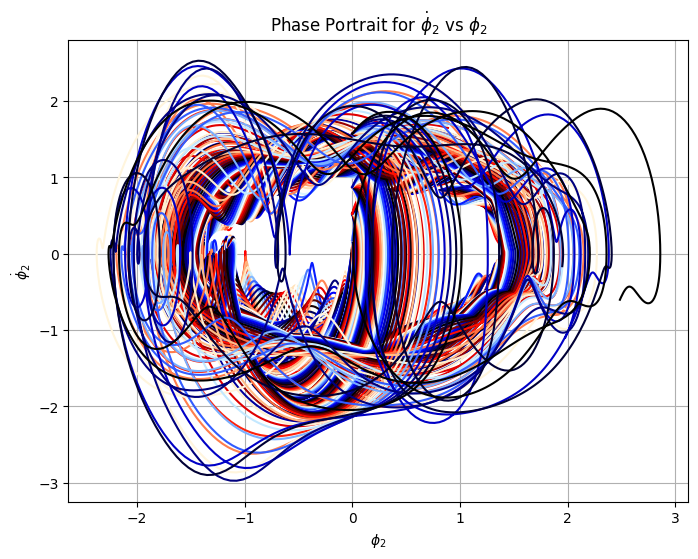

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# Define the differential equations for phi2_double_dot
def phi2_double_dot_eq(y, t, b, g, k1, alpha1, k2, alpha2, phib, Qdrive1, Qdrive2, Qdrive3, theta1_dot, phi1_dot):
    theta1, theta1_dot, phi1, phib, phi1_dot, phi2, phi2_dot = y

    # Equations for phi2_double_dot
    d_phi2_double_dot_dt = (
        (1 / ((1/4) * m * l**2)) *
        (
            ((1/4) * m * l**2 + (1/2) * m * l**2 * np.cos(phib + phi1)) / ((9/4) * m * l**2 - m * l**2 * np.cos(phib + phi1)**2 - m * l**2 * np.cos(phib + phi2)**2) *
            (
                theta1_dot * phi1_dot * m * l**2 * np.sin(phib + phi1) +
                theta1_dot * phi2_dot * m * l**2 * np.sin(phib + phi2) +
                (1/2) * m * l**2 * theta1_dot**2 * (np.sin(phib + phi1) - np.sin(phib + phi2)) +
                2 * np.sin(phib + phi1) * np.cos(phib + phi1) -
                2 * np.sin(phib + phi2) * np.cos(phib + phi2) +
                k2 * (phi1 - phi2) +
                k2 * alpha2 * (phi1**3 - phi2**3) -
                theta1_dot * (9 * b * l**2 / 4 - b * l**2 * np.cos(phib + phi1)**2 - b * l**2 * np.cos(phib + phi2)**2) +
                (Qdrive1 - Qdrive2 + Qdrive3) +
                m * g * l * (np.sin(phib + phi2 - theta1) * np.cos(phib + phi2)) - np.sin(phib + phi1 + theta1) * np.cos(phib + phi2) +
                2 * k2 * (phi1 * np.cos(phib + phi1) - phi2 * np.cos(phib + phi2)) +
                2 * k2 * alpha2 * (phi1**3 * np.cos(phib + phi1) - phi2**3 * np.cos(phib + phi2)) -
                2 * (Qdrive2 * np.cos(phib + phi1) - Qdrive3 * np.cos(phib + phi2)) +
                (1/2) * phi1_dot**2 * m * l**2 * np.sin(phib + phi1) -
                (1/2) * phi2_dot**2 * m * l**2 * np.sin(phib + phi2) +
                (5/2) * m * g * l * np.sin(theta1) -
                k1 * theta1 - k1 * alpha1 * theta1**3
            )
         -
        (1/2) * m * l**2 * theta1_dot**2 * np.sin(phib + phi2) +
        (1/2) * m * g * l * np.sin(phib + phi2 - theta1) -
        k2 * phi2 - k2 * alpha2 * phi2**3 -
        phi2_dot * (b * l**2 / 4) +
        theta1_dot * (b * l**2 / 4 + (b * l**2 / 2) * np.cos(phib + phi1)) +
        Qdrive3
    ))

    # Equations for theta1_dot and phi1_dot
    d_theta1_dot_dt = 0  # Assuming theta1_dot is constant
    d_phi1_dot_dt = 0  # Assuming phi1_dot is constant

    return [theta1_dot, d_theta1_dot_dt, phi1, phi1_dot, phi2, phi2_dot, d_phi2_double_dot_dt]

# Parameters
m = 1
g = 9.8
l = 1
k1 = 1
alpha1 = 1
k2 = 1
alpha2 = 0.5
phib = 30
Qdrive1 = 1
Qdrive2 = 1
Qdrive3 = 1
b = 0.5

# range of initial conditions for phi2 and its derivative
phi2_range = np.linspace(-np.pi/2, np.pi/2, 10)
phi2_dot_range = np.linspace(-3, 3, 20)

# Time points for integration
t = np.linspace(0, 20, 1000)

# Define external parameters theta1_dot and phi1_dot
theta1_dot = 0  # Set to some value
phi1_dot = 0  # Set to some value

# Plot the phase portrait for phi2_double_dot
plt.figure(figsize=(8, 6))
color_map = plt.cm.flag(np.linspace(0, 1, len(phi2_range) * len(phi2_dot_range)))

idx = 0
for phi2_0 in phi2_range:
    for phi2_dot_0 in phi2_dot_range:
        y0 = [0, 0, 0, phib, 0, phi2_0, phi2_dot_0]  # Initial conditions for all variables
        solution = odeint(phi2_double_dot_eq, y0, t, args=(b, g, k1, alpha1, k2, alpha2, phib, Qdrive1, Qdrive2, Qdrive3, theta1_dot, phi1_dot))
        _, _, _, _, phi2, phi2_dot, _ = solution.T
        plt.plot(phi2, phi2_dot, color=color_map[idx], alpha=1)
        idx += 1

plt.xlabel(r'$\phi_2$')
plt.ylabel(r'$\dot{\phi}_2$')
plt.title('Phase Portrait for $\dot{\phi}_2$ vs $\phi_2$')
plt.grid(True)
plt.show()